# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 

student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Your code here.
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

In [3]:
student_data.head()

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

In [4]:
# Your code here.
student_data.sort_values(by='Age')

,Age,Tardies
0,17,10
6,19,9
3,21,9
7,26,6
2,27,5
9,30,3
4,36,4
5,48,2
1,51,1
8,54,0


In [5]:
student_data.head()

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


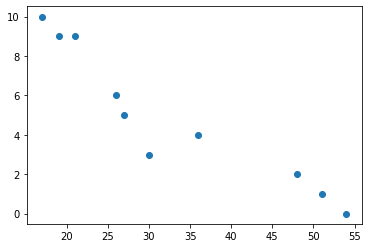

In [6]:
plt.scatter(student_data['Age'], student_data['Tardies'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
#from the scatter plot it is possible to predict that as age increases, tardies decrease

In [7]:
import scipy
from scipy.interpolate import interp1d

In [8]:
student_data['Age'].sort_values(ascending = True)

0    17
6    19
3    21
7    26
2    27
9    30
4    36
5    48
1    51
8    54
Name: Age, dtype: int64

In [9]:
# Your response here. 
x = student_data['Age']
y = student_data['Tardies']
f = interp1d (x, y, 'quadratic')

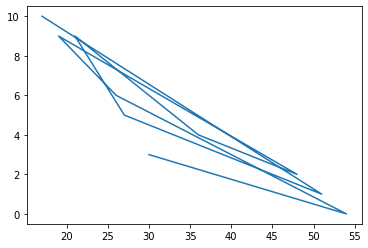

In [10]:
plt.plot(x,f(x))

In [11]:
from scipy import stats

In [12]:
slope, intercept, r_value, _, std_err = stats.linregress(x, y)

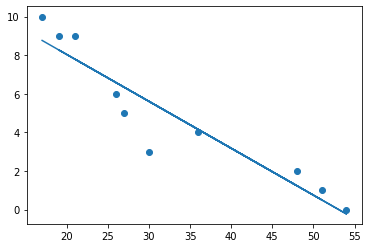

In [13]:
plt.scatter(x,y)
plt.plot(x, slope*x+intercept)

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [27]:
# Your response here.
#correlation:
correlation = student_data['Age'].corr(student_data['Tardies'])

#covariance:
covariance = student_data[['Age', 'Tardies']].cov()

In [30]:
correlation

-0.9391626886887122

In [31]:
covariance

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [15]:
# Your response here.
slope, intercept, r_value, _, std_err = stats.linregress(x, y)

In [ ]:
#I decided to use linear regression, because the correlation is high, and the outcome variable is the Tardies

Plot your regression model on your scatter plot.

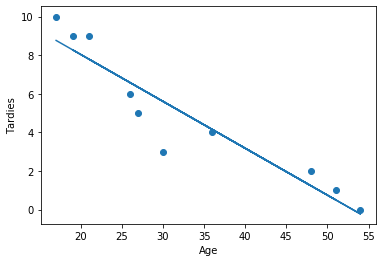

In [33]:
# Your code here.
plt.scatter(x,y)
plt.plot(x, slope*x+intercept)
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [17]:
'''There is a high correlation between age and tardies, so I would say that age is in fact a good predictor of tardiness'''

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [18]:
# Import any libraries you may need & the data


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [88]:
# Your response here. 
vehicles = pd.read_csv('/Users/sofiacostadesousa/Desktop/Ironhack/09.04/lab-regression-analysis/vehicles.csv')

In [89]:
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [90]:
vehicles = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG','CO2 Emission Grams/Mile', 'Fuel Cost/Year']]
vehicles.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,1984,4.0,19.388824,17,522.764706,1950
1,1984,6.0,25.354615,13,683.615385,2550
2,1985,4.0,20.600625,16,555.437500,2100
3,1985,6.0,25.354615,13,683.615385,2550
4,1987,6.0,20.600625,16,555.437500,2550


In [91]:
vehicles.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


In [92]:
vehicles.corr().loc['CO2 Emission Grams/Mile']

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
CO2 Emission Grams/Mile    1.000000
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

No handles with labels found to put in legend.


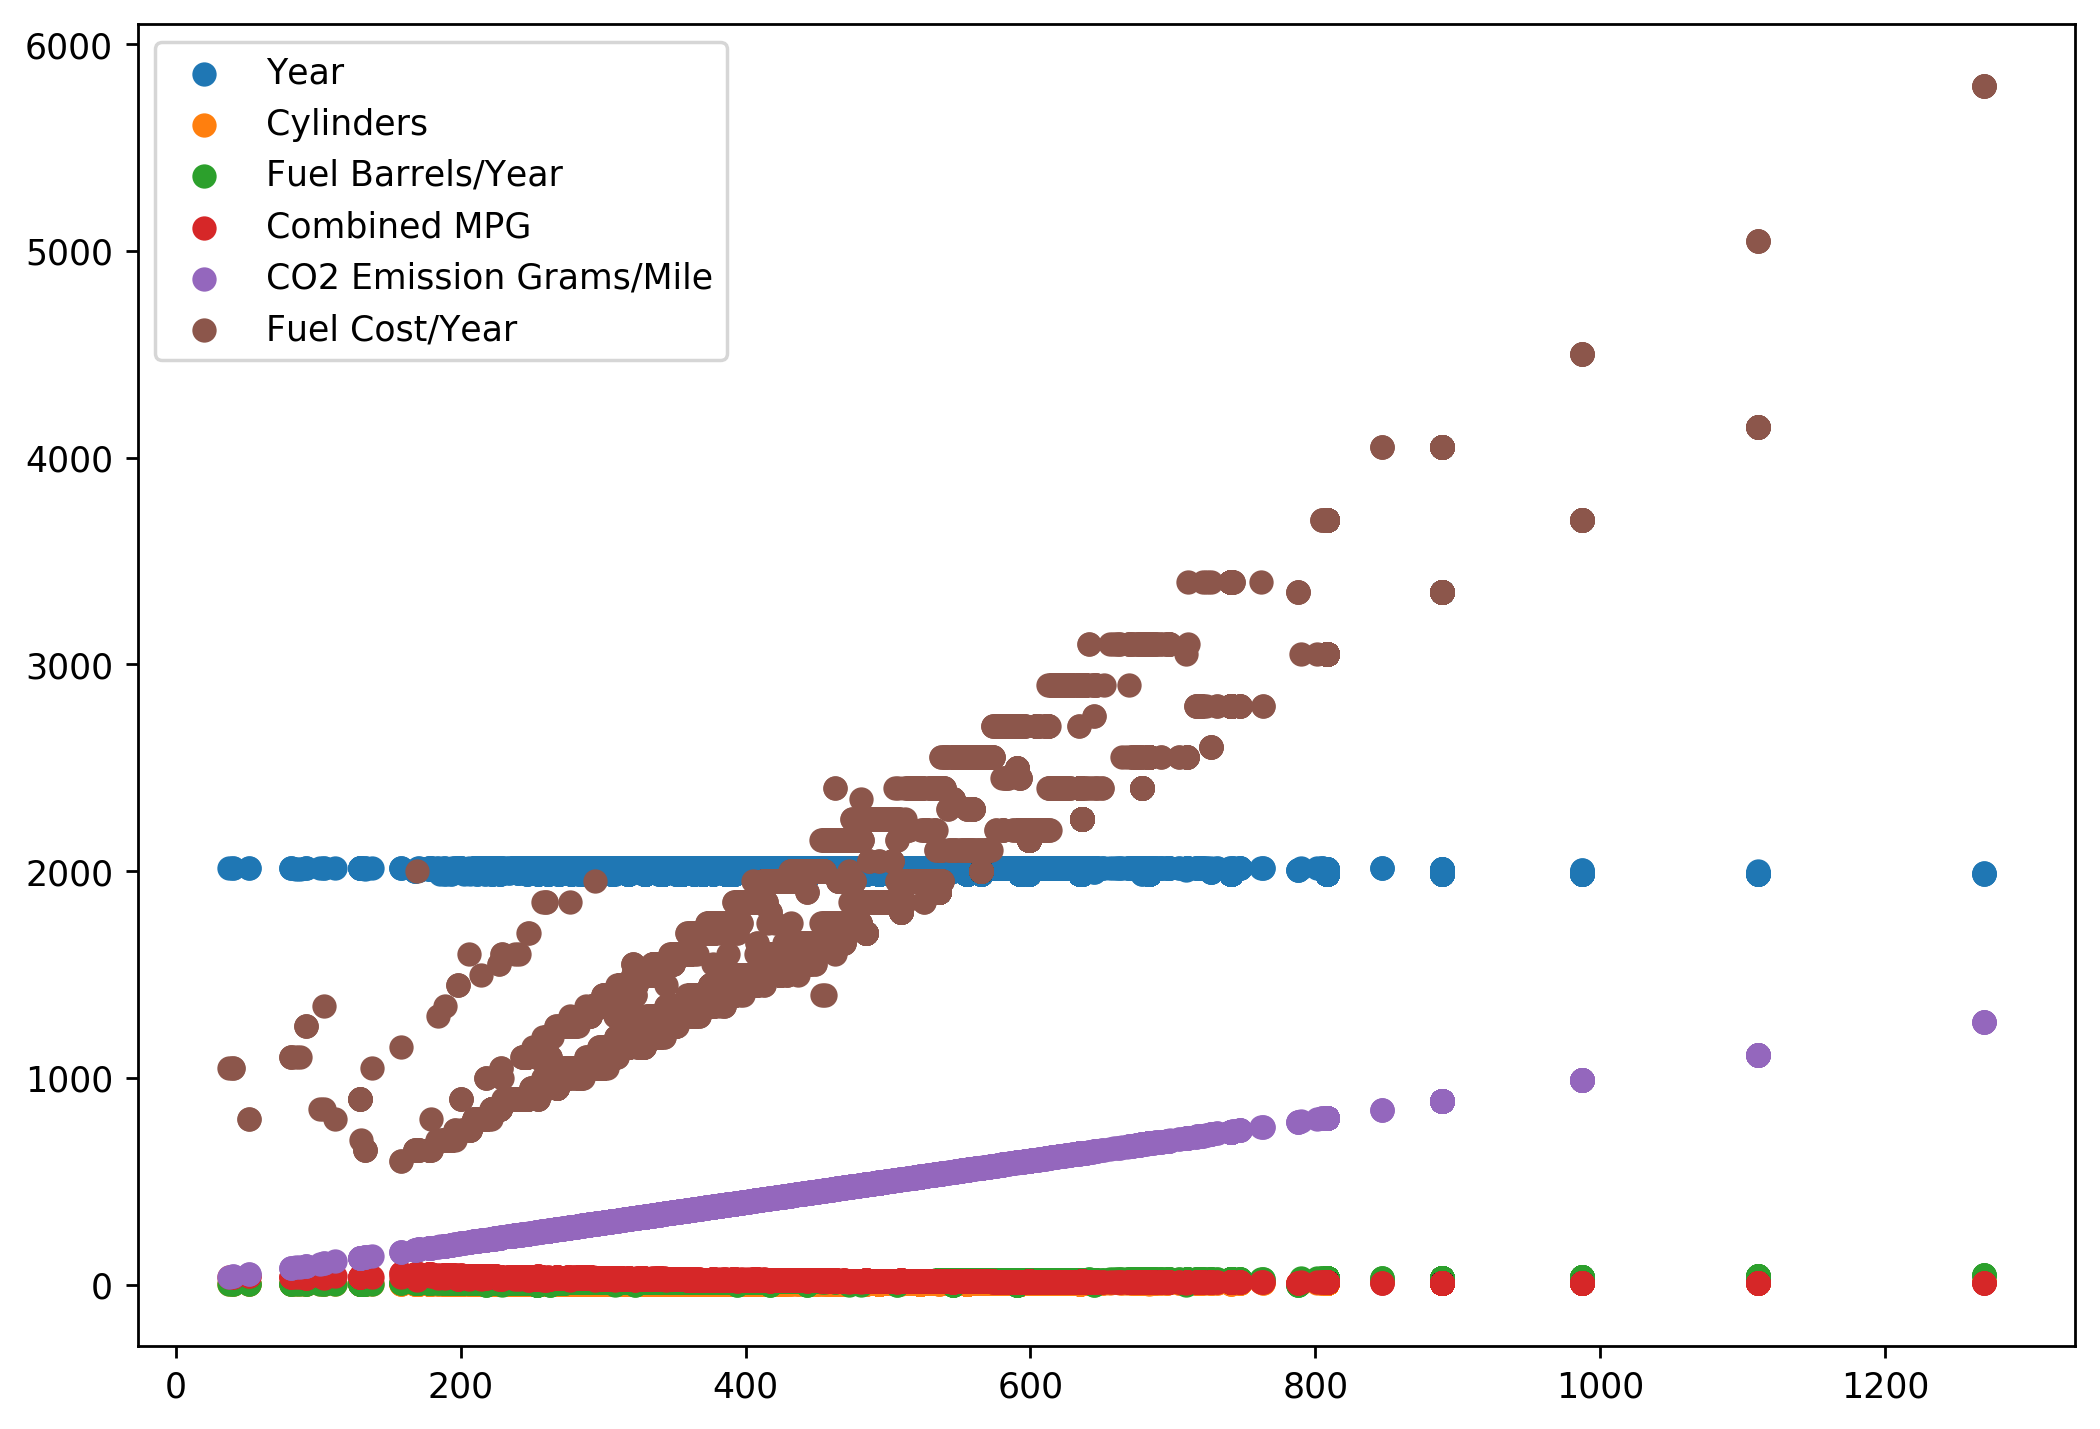

In [93]:
# Your response here. 
plt.figure(figsize=(10,7), dpi =  250)
plt.legend(loc='best')
for i in vehicles:
    plt.scatter(vehicles['CO2 Emission Grams/Mile'], vehicles[i], label = i)
    #slope, intercept, r_value, _, std_err = stats.linregress(ds['CO2 Emission Grams/Mile'], i)
    #plt.plot(ds['CO2 Emission Grams/Mile'], slope*ds['CO2 Emission Grams/Mile']+intercept, label = f'regression {i}')
plt.legend(loc='best')

In [ ]:
#i can't do the regression inside the for loop, it gives an error. How to do a for loop to include the regression?

In [86]:
import seaborn as sns

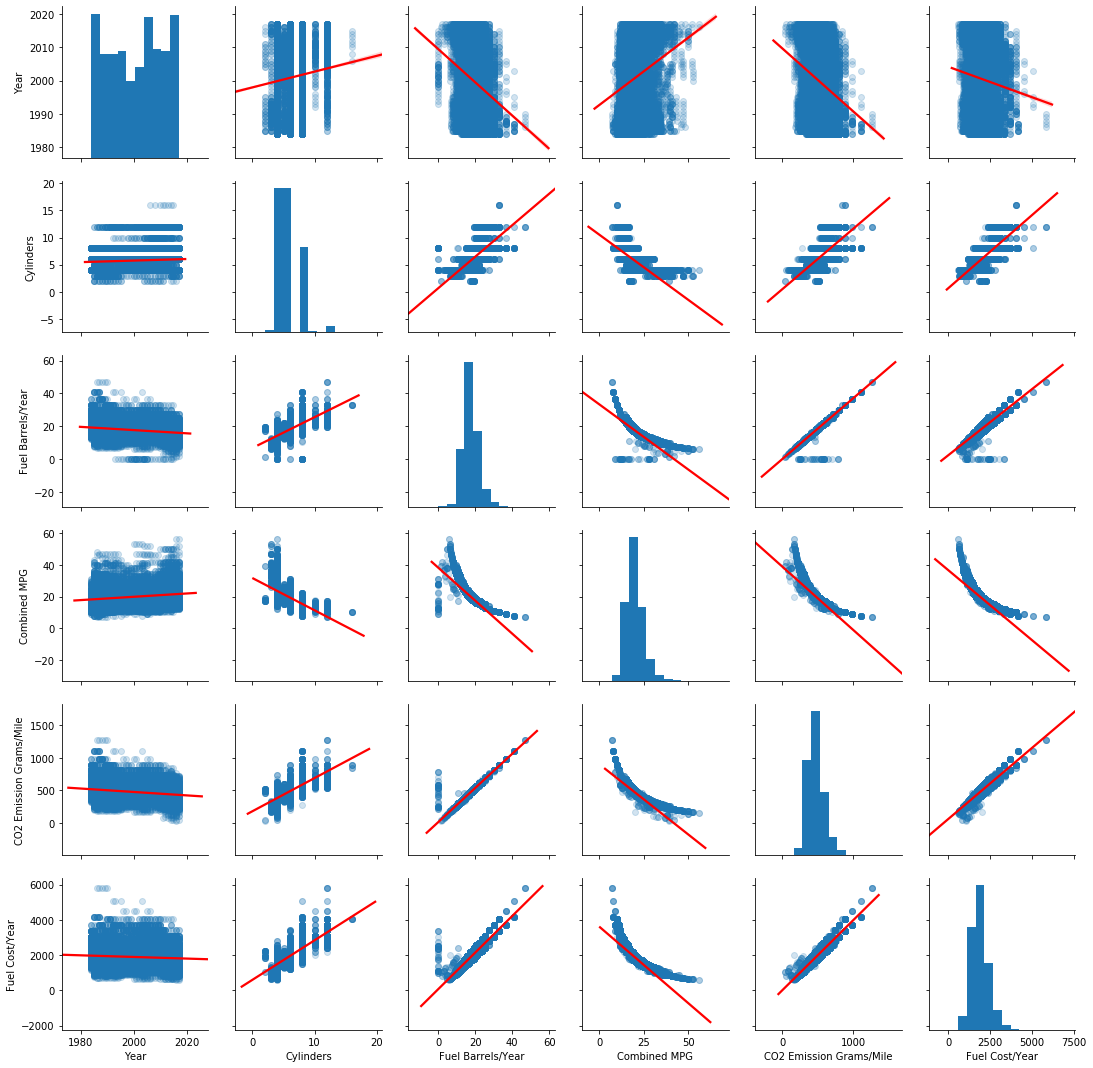

In [94]:
sns.pairplot(data=vehicles, kind="reg", plot_kws={'line_kws':{'color':'red'} ,'scatter_kws':{'alpha':0.2}})

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [21]:
# Your response here. 


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [70]:
# Your code here.
ds = pd.DataFrame({'X':[1,3,4,6,8,9,11,14], 'Y':[1,2,4,4,5,7,8,13]})

In [71]:
ds

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

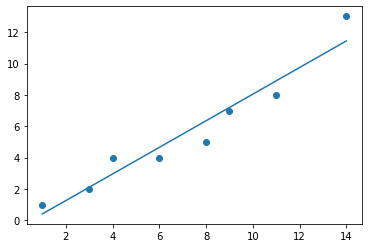

In [79]:
# Your code here.
plt.scatter(ds['X'], ds['Y'])
slope, intercept, r_value, _, std_err = stats.linregress(ds['X'], ds['Y'])
plt.plot(ds['X'], slope*ds['X']+intercept)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [80]:
# Your response here. 
slope, intercept, r_value, _, std_err = stats.linregress(ds['X'], ds['Y'])

In [81]:
slope

0.8484848484848485

In [82]:
intercept

-0.43939393939393945

In [83]:
r_value

0.9652303546573691

In [84]:
std_err

0.09380896778286217

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [96]:
# Your response here. 
#there are no outliers

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [26]:
# Your response here. 
